# PINGDINDSHAN'S NUMBER 


## PREIZKUŠANJE FUNKCIJ SAGEA

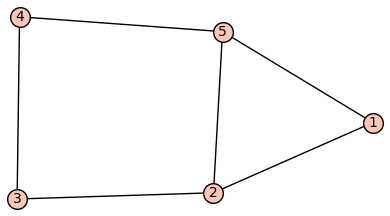

In [4]:
### Koda v Sage-u, ki izriše graf s 5 vozlišči in 6 povezavami

# Uvozim razred Graph iz SageMath-a
G = Graph()

# Dodam 5 vozlišč
G.add_vertices([1, 2, 3, 4, 5])

# Vozliščem dodam povezave
edges = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1), (2, 5)]
G.add_edges(edges)

# Izrišem graf
G.show()
# dob bibuuerb

In [18]:
def pds(G):
    stevilo = len(G.vertices())
    for v in G.vertices():
        for u in G.vertices():
            if u != v:
                stevilo += len(G.all_paths(u,v))
    return stevilo


In [9]:
pingdingshan(G)

69

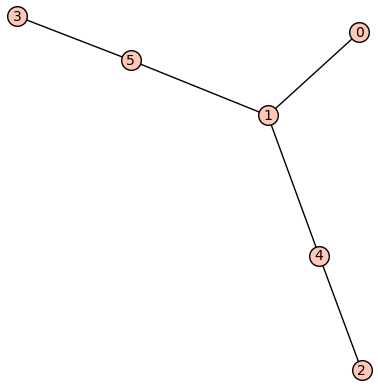

In [21]:
H = graphs.RandomGNM(6,5)
H.show()

In [22]:
pingdingshan(H)

36

## VSI GRAFI

In [ ]:
# Funkcija, ki ustvari vse grafe na i=1,...,12 vozliščih
def vsi_grafi():
    seznam_vseh = []
    for i in range(1,7):
        G = list(graphs(i))
        for g in G:
            if g.is_connected():
                seznam_vseh.append(g)
    return seznam_vseh

vsi_grafi = vsi_grafi()
vsi_grafi



[Graph on 1 vertex,
 Graph on 2 vertices,
 Graph on 3 vertices,
 Graph on 3 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 4 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 5 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 vertices,
 Graph on 6 

In [ ]:
from sage.graphs.graph_generators import GraphGenerators

In [24]:
for G in GraphGenerators.all_graphs(3):
    show(G)

AttributeError: type object 'GraphGenerators' has no attribute 'all_graphs'

## DVODELNI GRAFI

In [2]:
# Funkcija, ki ustvari vse dvodelne grafe na i vozliščih, kjer i = 1, ..., 12.

def dvodelni_grafi():
    seznam_dvodelnih = []
    for i in range(1, 13):
        for k in range(0, i + 1):
            dvodelen_graf = graphs.CompleteBipartiteGraph(k, i - k)
            seznam_dvodelnih.append(dvodelen_graf)
    return seznam_dvodelnih

dvodelni = dvodelni_grafi()
len(dvodelni)


90

In [ ]:
pds_dvodelni = {}
def st_poti(seznam_grafov):
    
    for G in seznam_grafov:
        st_vozlisc = len(G.vertices())
        if pds_dvodelni.get(st_vozlisc) is None:
            pds_dvodelni[st_vozlisc] = []
        pds_dvodelni[st_vozlisc] = pds_dvodelni[st_vozlisc].append(pds(G))
    return pds_dvodelni 


SyntaxError: 'return' outside function (1681668147.py, line 7)

## GRAFI BREZ CIKLOV DOLŽINE TRI

Naslednja funkcija iz množice vseh grafov izbere tiste, ki ne vsebujejo trikotnikov oz. cikov dolžine 3. To stori za vse grafe z 1,...,12 vozlišči

In [ ]:
def grafi_brez_trikotnikov():
    seznam_brez_trikotnikov = []
    trikotnik = graphs.CycleGraph(3)
    for g in vsi_grafi:
        if g.subgraph_search(trikotnik) is None:
            seznam_brez_trikotnikov.append(g)
    return seznam_brez_trikotnikov
            
grafi_brez_trikotnikov = grafi_brez_trikotnikov()
        

Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 12 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [20]:
slovar_brez_trikotnikov = {
    1:[], 2:[], 3:[], 4:[], 5:[], 6:[],7:[], 8:[], 9:[], 10:[], 11:[], 12:[]}

def pds_brez_trikotnikov():
    for g in grafi_brez_trikotnikov:
        slovar_brez_trikotnikov[g.order()].append(pds(g))
    return slovar_brez_trikotnikov

pds_brez_trikotnikov= pds_brez_trikotnikov()